## Matrix Factorization

### Import necessary libraries

In [3]:
import pandas as pd
from surprise import Dataset, Reader, KNNWithMeans, SVD, accuracy,NMF
from surprise.model_selection import train_test_split

### Split into training and test sets

In [4]:
reader = Reader(rating_scale=(1,5))
merged_data = pd.read_csv('../../data/Final_data/Final_data.csv')
data = Dataset.load_from_df(merged_data[['UserID','MovieID','Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

### SVD Implementation

In [5]:
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

In [6]:
print("SVD RMSE:")
accuracy.rmse(predictions_svd)

SVD RMSE:
RMSE: 0.8809


0.8809145562739079

In [7]:
from surprise import accuracy

# Calculate and print MAE for SVD predictions
mae_svd = accuracy.mae(predictions_svd)
print(f"SVD MAE: {mae_svd:.4f}")

MAE:  0.6773
SVD MAE: 0.6773


### NMF Implementation

In [8]:
# Initialize and train the NMF algorithm
algo_nmf = NMF()
algo_nmf.fit(trainset)

In [9]:
# Test the NMF algorithm on the test set
predictions_nmf = algo_nmf.test(testset)

In [10]:
# Evaluate RMSE for NMF
print("NMF RMSE:")
accuracy.rmse(predictions_nmf)

NMF RMSE:
RMSE: 0.9287


0.928687303800257

In [11]:
from surprise import accuracy

# Calculate and print MAE for NMF predictions
mae = accuracy.mae(predictions_nmf)
print(f"NMF MAE: {mae:.4f}")

MAE:  0.7127
NMF MAE: 0.7127


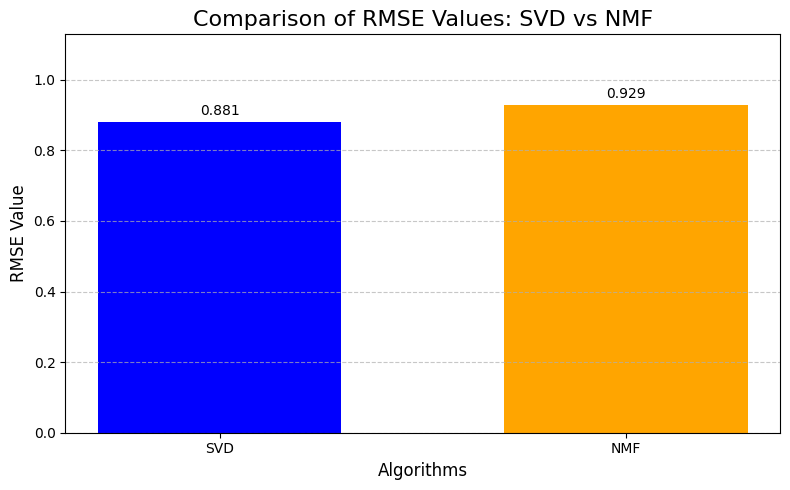

In [12]:
import matplotlib.pyplot as plt

# Define RMSE values for SVD and NMF
algorithms = ['SVD', 'NMF']
rmse_values = [accuracy.rmse(predictions_svd, verbose=False),
               accuracy.rmse(predictions_nmf, verbose=False)]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(algorithms, rmse_values, color=['blue', 'orange'], width=0.6)

# Add plot details
plt.title('Comparison of RMSE Values: SVD vs NMF', fontsize=16)
plt.ylabel('RMSE Value', fontsize=12)
plt.xlabel('Algorithms', fontsize=12)
plt.ylim(0, max(rmse_values) + 0.2)  # Extend y-axis for clarity

# Annotate RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()


In [14]:
import pickle

def save_model(model, model_path):
    try:
        with open(model_path, "wb") as f:
            pickle.dump(model, f)
        print(f"Model saved to {model_path}")
    except Exception as e:
        print(f"An error occurred while saving the model to {model_path}: {e}")

# Example usage
# Assuming `algo_svd` and `algo_nmf` are your trained models
model_dir = "../../models/matrix_factorization/"
save_model(algo_svd, f"{model_dir}svd_model.pkl")
save_model(algo_nmf, f"{model_dir}nmf_model.pkl")


Model saved to ../../models/matrix_factorization/svd_model.pkl
Model saved to ../../models/matrix_factorization/nmf_model.pkl
